# Geodatenanalyse 1

## Tag 3 / Block 1 - Lösung zur Übung 8

### Aufgabe 1
Wir möchten uns den Datensatz des NASA Exoplanten Archives, den wir in der vorherigen Übung bereits kennen gelernt haben, jetzt noch etwas genauer anschauen.

Zusätzlich zu den allgemeinen Informationen zu Planetennamen, Anzahl der Sterne und Planeten im System sowie Entdeckungs-Methode, -Jahr und -Einrichtung, die uns bereits aus der .xlsx Datei:

 > *NASA_exoplanets.xlsx*
 
bekannt sind, gibt es noch eine Vielzahl weiterer Parameter die erhoben wurden. Einige davon finden sich in mehreren .csv Dateien im Übungsordner:

**Planeten Parameter**
- planet_part1.csv
- planet_part2.csv

**System Daten**
- system_data.csv

**Stellar Daten**
- stellar_data.csv

#### 1.1 Daten zusammenführen
- Lade die NASA_exoplanten Datei und alle zusätzlichen tabellarischen Daten aus den <font color="green">csv. Dateien</font> jeweils in einen Pandas **DataFrame**.
- Schaue dir die neuen Datensätze genau an. Gibt es Gemeinsamkeiten, wie zum Beispiel eine Kennung? Wie lassen sie sich kombinieren? 
- Verwende die <font color="red">concat()</font> und <font color="red">merge()</font> Methoden um alle Daten in einem **DataFrame** zusammenzuführen.
- Wieviele Spalten und Zeilen hat der komplette **DataFrame**?

In [137]:
# Importiere Pandas
import pandas as pd

In [138]:
## Laden der Datensätze
# Exceltabelle
exoplanets = pd.read_excel("example_data/NASA_exoplanet_UE/NASA_exoplanets.xlsx")
# Planeten Daten Teil 1
planet_data_1 = pd.read_csv("example_data/NASA_exoplanet_UE/planet_part1.csv")
# Planeten Daten Teil 2
planet_data_2 = pd.read_csv("example_data/NASA_exoplanet_UE/planet_part2.csv")    
# System Daten
system_data = pd.read_csv("example_data/NASA_exoplanet_UE/system_data.csv")
# Stellar Daten
stellar_data = pd.read_csv("example_data/NASA_exoplanet_UE/stellar_data.csv")

In [139]:
## Daten untersuchen mit Methoden wie .head(), .tail(), .info(), .shape().
planet_data_1.head(3)
planet_data_2.head(3)
# ...

,pl_name,orbital_period,radius_earth,radius_jupiter,mass_earth,mass_jupiter,equi_temp
0,GJ 411 b,12.95,1.54,0.14,2.99,0.01,350.0
1,GJ 422 b,20.13,3.33,0.30,11.07,0.03,NaN
2,GJ 4276 b,13.35,4.22,0.38,16.57,0.05,NaN


In [140]:
# Hänge die beiden Planetendatensätze mit Hilfe von Concat aneinander
planet_data = pd.concat([planet_data_1,planet_data_2],axis=00)
print(planet_data.shape)

"""
DataFrames können nacheinander einzeln via pd.merge hinzugefügt werden. 
Alternative gibt es auch folgende Lösung:

https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes
"""
from functools import reduce

# Sammle alle Dataframes in einer Liste
dfs = [exoplanets, planet_data, system_data, stellar_data]

# Füge alle Daten anhand der gemeinsamen Kennung "pl_name" zusammen
exoplanets = reduce(lambda  left,right: pd.merge(left,right,on=['pl_name'],
                                            how='outer'), dfs)

exoplanets

(4352, 7)


,pl_name,number_stars,number_planets,discoverymethod,disc_year,disc_facility,disc_pub_date,controversial,orbital_period,radius_earth,...,mass_earth,mass_jupiter,equi_temp,ra,dec,distance,stellar_spectype,st_radius_sun,st_mass_sun,stellar_age
0,11 Com b,2,1,Radial Velocity,2007,Xinglong Station,2008-01,0,326.03,12.1,...,6165.60,19.40,NaN,185.18,17.79,93.18,G8 III,19.00,2.70,NaN
1,11 UMi b,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,2009-10,0,516.22,12.3,...,4684.81,14.74,NaN,229.27,71.82,125.32,K4 III,29.79,2.78,1.56
2,14 And b,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,2008-12,0,185.84,12.9,...,1525.50,4.80,NaN,352.82,39.24,75.44,K0 III,11.00,2.20,NaN
3,14 Her b,1,1,Radial Velocity,2002,W. M. Keck Observatory,2003-01,0,1773.40,12.9,...,1481.09,4.66,NaN,242.60,43.82,17.93,K0 V,0.93,0.90,3.90
4,16 Cyg B b,3,1,Radial Velocity,1996,Multiple Observatories,1997-07,0,798.50,13.5,...,565.74,1.78,NaN,295.47,50.52,21.14,G2.5 V,1.13,1.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4347,tau Gem b,1,1,Radial Velocity,2013,Lick Observatory,2013-07,0,305.50,12.1,...,6547.00,20.60,NaN,107.78,30.24,112.54,K2 III,26.80,2.30,1.22
4348,ups And b,2,3,Radial Velocity,1996,Lick Observatory,1997-01,0,4.62,14.0,...,218.53,0.69,NaN,24.20,41.40,13.41,F8 V,1.56,1.30,5.00
4349,ups And c,2,3,Radial Velocity,1999,Multiple Observatories,1999-12,0,241.26,13.4,...,629.60,1.98,NaN,24.20,41.40,13.41,F8 V,1.56,1.30,5.00
4350,ups And d,2,3,Radial Velocity,1999,Multiple Observatories,1999-12,0,1276.46,13.0,...,1313.22,4.13,NaN,24.20,41.40,13.41,F8 V,1.56,1.30,5.00


In [141]:
exoplanets.shape

(4352, 21)

In [142]:
exoplanets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4352 entries, 0 to 4351
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pl_name           4352 non-null   object 
 1   number_stars      4352 non-null   int64  
 2   number_planets    4352 non-null   int64  
 3   discoverymethod   4352 non-null   object 
 4   disc_year         4352 non-null   int64  
 5   disc_facility     4352 non-null   object 
 6   disc_pub_date     4352 non-null   object 
 7   controversial     4352 non-null   int64  
 8   orbital_period    4212 non-null   float64
 9   radius_earth      4338 non-null   float64
 10  radius_jupiter    4336 non-null   float64
 11  mass_earth        4330 non-null   float64
 12  mass_jupiter      4330 non-null   float64
 13  equi_temp         3242 non-null   float64
 14  ra                4352 non-null   float64
 15  dec               4352 non-null   float64
 16  distance          4347 non-null   float64


### Aufgabe 2
#### 2.1 Split-Apply-Combine
Nutze die <font color="red">groupby()</font> Methode um verschiedene Statistiken zu berechnen:

- Was ist für jede Methode die jeweils maximal gemessene Entfernung eines Exoplaneten?

- Wie groß ist die  <font color="green">mittlere</font> <font color="peachpuff">relative Masse der Exoplaneten</font> (im Verhältnis zur Erde) in Abhängigkeit von der <font color="darkred">Anzahl der Sterne</font> und der <font color="darkred">Anzahl Planeten</font> in einem System?

#### 2.2 Ergebnis darstellen
Erstelle für das Ergebnis zu den mittleren relativen Massen aus der vorherigen Teilaufgabe 2.1 einen Barplot. Stelle die relativen Masse als abhängige Variable dar.

**Hinweis:**
mit der <font color="red">.unstack(level=0)</font> Methode kannst du aus einer **Series** wieder einen **DataFrame** machen.

In [143]:
# Maximal gemessene Entfernung eines Exoplaneten für jede Methode
exoplanets.groupby("discoverymethod")["distance"].max()

discoverymethod
Astrometry                         20.77
Disk Kinematics                   183.86
Eclipse Timing Variations        1188.54
Imaging                           190.72
Microlensing                     8200.00
Orbital Brightness Modulation    1672.94
Pulsar Timing                    1200.00
Pulsation Timing Variations      1382.89
Radial Velocity                  1539.71
Transit                          8500.00
Transit Timing Variations        1027.45
Name: distance, dtype: float64

In [154]:
#  Mittlere relative Masse der Exoplaneten in Abhängigkeit der Anzahl Sterne und Planeten in einem System?
system_config = exoplanets.groupby(["number_stars","number_planets"])["mass_earth"].mean()
system_config

number_stars  number_planets
1             1                  652.772351
              2                  263.969286
              3                   94.510922
              4                   95.558922
              5                   33.208300
              6                   25.863611
              7                    0.801429
              8                   83.356250
2             1                  839.518874
              2                  762.295968
              3                  194.082143
              4                  147.573125
              5                  141.881333
              6                   11.643333
3             1                 1028.214571
              2                  418.077500
              5                    2.015000
4             1                 2280.705000
Name: mass_earth, dtype: float64

In [172]:
# Unstack
print(type(system_config))
unstack = system_config.unstack(level=0)
print(type(unstack))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Text(0, 0.5, 'relative mass to earth')

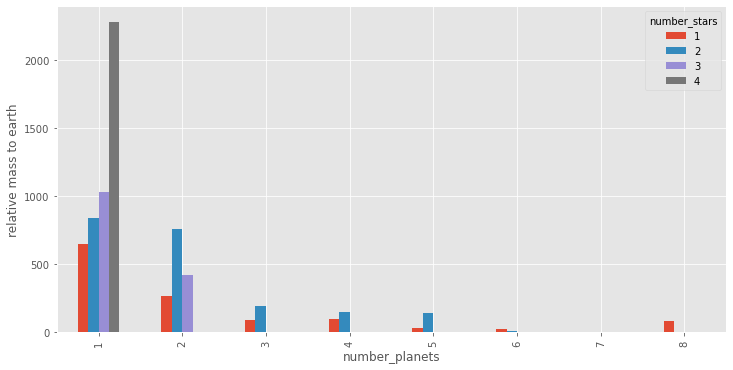

In [162]:
# Plotting
# Barplot für Massen nach Anzahl Planeten und Sterne geordnet
system_config.unstack(level=0).plot(kind='bar',figsize=(12,6))
plt.ylabel("relative mass to earth")

### Aufgabe 3
Wir möchten das Entdeckungsjahr (*disc_year*) als Datum setzten, um den Funktionsumfang von Pandas **datetime** nutzen zu können.

#### 3.1 Entdeckungsjahr konvertieren
Formatiere die <font color="green">disc_year</font> Spalte als **datetime** mit dem Datentyp *datetime64[ns]*. Damit das Datum in der Spalte <font color="green">disc_year</font> von der <font color="red">to_datetime</font> Methode korrekt interpretiert wird, müssen wir einen zusätzlichen Formatparameter angeben: 
> format="%Y"

#### 3.2 Entdeckungen von Exoplaneten über die Zeit
- Was ist das frühste Jahr in dem ein Exoplanet entdeckt wurde?
- Wieviele Entdeckungen wurden jedes Jahr gemacht? Stelle dein Ergebnis als Barplot da. \

    **Hinweis:** Nutze hierfür die <font color="red">groupby()</font> Methode in Kombination mit der <font color="red">count()</font> Methode.

#### extra:
- Wieviele Entdeckungen wurden jedes Jahr jeweils mit der "Radial Velocity","Transit" und "Microlensing" Methode gemacht? Erinnere dich an die logischen Filter und die <font color="red">isin()</font> Methode aus der vorherigen Vorlesung.
- Erstelle auch hierfür einen Barplot.

#### 3.3 Datetime index
- Setze das Entdeckungsjahr als neuen Index und sortiere ihr aufsteigend, von der ersten Entdeckung bis Heute.
- Erstelle einen neuen **DataFrame** für die Distanzwerte (*distance*) der Exoplaneten die im Zeitraum von Anfang 1998 bis Ende 2010 entdeckt wurden.

In [173]:
# Entdeckungsjahr in datetime konvertieren
exoplanets.disc_year = pd.to_datetime(exoplanets.disc_year,format="%Y")
exoplanets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4352 entries, 0 to 4351
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pl_name           4352 non-null   object        
 1   number_stars      4352 non-null   int64         
 2   number_planets    4352 non-null   int64         
 3   discoverymethod   4352 non-null   object        
 4   disc_year         4352 non-null   datetime64[ns]
 5   disc_facility     4352 non-null   object        
 6   disc_pub_date     4352 non-null   object        
 7   controversial     4352 non-null   int64         
 8   orbital_period    4212 non-null   float64       
 9   radius_earth      4338 non-null   float64       
 10  radius_jupiter    4336 non-null   float64       
 11  mass_earth        4330 non-null   float64       
 12  mass_jupiter      4330 non-null   float64       
 13  equi_temp         3242 non-null   float64       
 14  ra                4352 n

In [66]:
exoplanets.disc_year.min()

(Timestamp('1989-01-01 00:00:00'), Timestamp('2021-01-01 00:00:00'))

In [176]:
# Wieviele Entdeckungen wurden jedes Jahr gemacht
disc_by_year = exoplanets.groupby(by=exoplanets.disc_year.dt.year)["disc_year"].count()
disc_by_year.index = disc_by_year.index.astype(int)
disc_by_year

disc_year
1989       1
1992       2
1994       1
1995       1
1996       6
1997       1
1998       6
1999      13
2000      16
2001      12
2002      29
2003      22
2004      27
2005      36
2006      31
2007      52
2008      66
2009      95
2010      97
2011     138
2012     139
2013     125
2014     871
2015     157
2016    1505
2017     153
2018     315
2019     199
2020     222
2021      14
Name: disc_year, dtype: int64

<AxesSubplot:xlabel='disc_year'>

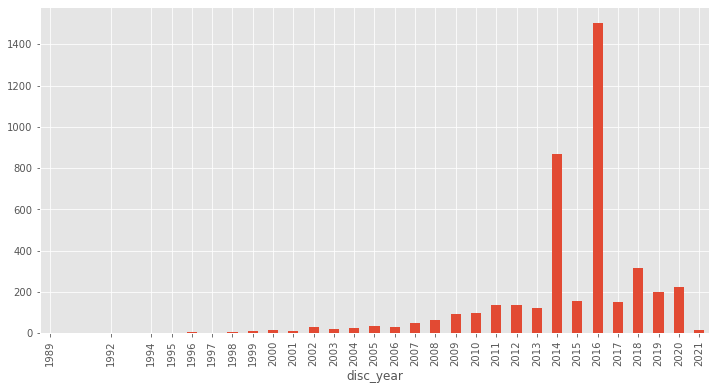

In [182]:
import matplotlib.pyplot as plt

# Plotting Style
plt.style.use('ggplot')

# Plotting mit Pandas
fig, ax = plt.subplots(figsize=(12, 6))
disc_by_year.plot(kind='bar',ax=ax)

<BarContainer object of 30 artists>

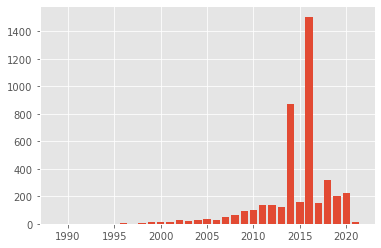

In [184]:
# Alternative Plotting-Variante mit pyplot
plt.bar(disc_by_year.index,disc_by_year)

In [116]:
# Nur bestimmte Entdeckungsmethoden berücksichtigen
mask = exoplanets["discoverymethod"].isin(["Radial Velocity","Transit","Microlensing"])
exoplanets = exoplanets.loc[mask,:]

In [117]:
# Wieviele Entdeckungen wurden jedes Jahr jeweils mit jeder Methode gemacht?
disc_year_method = exoplanets.groupby(by=[exoplanets.discoverymethod,
                                         exoplanets.disc_year.dt.year])["disc_pub_date"].count()
disc_year_method

discoverymethod  disc_year
Microlensing     2004           1
                 2005           2
                 2006           1
                 2008           2
                 2009           2
                             ... 
Transit          2017          90
                 2018         242
                 2019         108
                 2020         165
                 2021          10
Name: disc_pub_date, Length: 62, dtype: int64

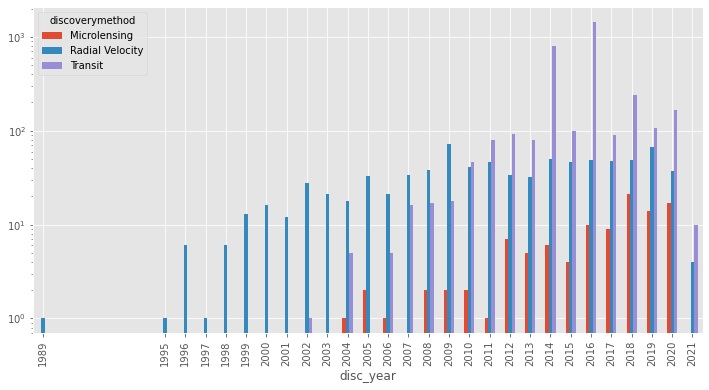

In [127]:
# Plotting Style
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(12, 6))
# Plotting
disc_year_method.unstack(level=0).plot(kind='bar',ax=ax)
# log skalierte Y-Achse
plt.yscale("log")

In [119]:
new = exoplanets.set_index("disc_year").sort_index()
new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4247 entries, 1989-01-01 to 2021-01-01
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pl_name           4247 non-null   object        
 1   number_stars      4247 non-null   int64         
 2   number_planets    4247 non-null   int64         
 3   discoverymethod   4247 non-null   object        
 4   disc_facility     4247 non-null   object        
 5   disc_pub_date     4245 non-null   datetime64[ns]
 6   controversial     4247 non-null   int64         
 7   orbital_period    4150 non-null   float64       
 8   radius_earth      4242 non-null   float64       
 9   radius_jupiter    4241 non-null   float64       
 10  mass_earth        4230 non-null   float64       
 11  mass_jupiter      4230 non-null   float64       
 12  equi_temp         3192 non-null   float64       
 13  ra                4247 non-null   float64       
 14  dec   

In [214]:
# DataFrame für die Distanzen von 1998-2010
dist_1998_2010 = new.loc["1998-01-01":"2010-12-31",["distance"]]
dist_1998_2010

,distance
disc_year,
1998-01-01,20.06
1998-01-01,45.95
1998-01-01,4.68
1998-01-01,37.67
1998-01-01,21.30
...,...
2010-01-01,161.40
2010-01-01,38.96
2010-01-01,38.96
